## Introduction:
World Health Organization has estimated that 12 million deaths occur yearly due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardiovascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high-risk patients and, in turn, reduce complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression
Data Preparation

### Cardiovascular Study Dataset Overview
The dataset is publicly available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients' information. It includes over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

### Data Set Characteristics:

**Demographic**:
* **Sex**: male or female("M" or "F")
* **Age**: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioral
* **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO")
* **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)
* **BP Meds**: whether or not the patient was on blood pressure medication (Nominal)
* **Prevalent Stroke**: whether or not the patient had previously had a stroke (Nominal)
* **Prevalent Hyp**: whether or not the patient was hypertensive (Nominal)
* **Diabetes**: whether or not the patient had diabetes (Nominal)
Medical(current)
* **Tot Chol**: total cholesterol level (Continuous)
* **Sys BP**: systolic blood pressure (Continuous)
* **Dia BP**: diastolic blood pressure (Continuous)
* **BMI**: Body Mass Index (Continuous)
* **Heart Rate**: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* **Glucose**: glucose level (Continuous)
Predict variable (desired target)
* **10 year risk of coronary heart disease CHD**(binary: “1”, means “Yes”, “0” means “No”)


### Load Required Python Library

In [ ]:
import time
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from IPython.display import display, HTML
from skimpy import skim
import warnings
warnings.filterwarnings('ignore')

### Read And Analyze Data

In [ ]:
# Load dataset
df = pd.read_csv("train.csv", sep=",")
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
df.shape

(3390, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3390.0,1694.500000,978.753033,0.00,847.25,1694.50,2541.75,3389.0
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0


In [ ]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3390   │ │ float64     │ 9     │                                                          │
│ │ Number of columns │ 17     │ │ int64       │ 6     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA    ┃ NA %     ┃ mean      ┃ sd     ┃ p0    ┃ p25   ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ id                     │     0 │        0 │      1700 │    980 │     0 │   850 │   2500 │   3400 │ ██████  │  │
│ │ age                    │     0 │        0 │        50 │    8.6 │    32 │    42 │     56 │     70 │ ▃█▇▇▅▂  │  │
│ │ education              │    87 │      2.6 │         2 │      1 │     1 │     1 │      3 │      4 │ █ ▆ ▃▂  │  │
│ │ cigsPerDay             │    22 │     0.65 │       9.1 │     12 │     0 │     0 │     20 │     70 │   █▃▁   │  │
│ │ BPMeds                 │    44 │      1.3 │      0.03 │   0.17 │     0 │     0 │      0 │      1 │    █    │  │
│ │ prevalentStroke        │     0 │        0 │    0.0065 │   0.08 │     0 │     0 │      0 │      1 │    █    │  │
│ │ prevalentHyp           │     0 │        0 │      0.32 │   0.46 │     0 │     0 │      1 │      1 │ █    ▄  │  │
│ │ diabetes               │     0 │        0 │     0.026 │   0.16 │     0 │     0 │      0 │      1 │    █    │  │
│ │ totChol                │    38 │      1.1 │       240 │     45 │   110 │   210 │    260 │    700 │   ▃█▁   │  │
│ │ sysBP                  │     0 │        0 │       130 │     22 │    84 │   120 │    140 │    300 │   ▄█▂   │  │
│ │ diaBP                  │     0 │        0 │        83 │     12 │    48 │    74 │     90 │    140 │  ▁▆█▂   │  │
│ │ BMI                    │    14 │     0.41 │        26 │    4.1 │    16 │    23 │     28 │     57 │   ▃█▂   │  │
│ │ heartRate              │     1 │    0.029 │        76 │     12 │    45 │    68 │     83 │    140 │  ▂█▅▁   │  │
│ │ glucose                │   300 │        9 │        82 │     24 │    40 │    71 │     87 │    390 │   █▁    │  │
│ │ TenYearCHD             │     0 │        0 │      0.15 │   0.36 │     0 │     0 │      0 │      1 │ █    ▁  │  │
│ └────────────────────────┴───────┴──────────┴───────────┴────────┴───────┴───────┴────────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ sex                       │       0 │          0 │                            1 │                     3400 │  │
│ │ is_smoking                │       0 │          0 │  

## Data Cleaning/Preparation

### Removing unnecessary columns

In [ ]:
# removing unnecessary columns
df.drop(['id'], inplace = True, axis=1,)

### Checking for duplicates

In [ ]:
len(df[df.duplicated()])

0

### Checking for rows with missing values

In [ ]:
df.isna().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
print(f"Number of cells with missing values: {df.isna().sum().sum()}")
print(f"Percentage of cells with missing values: {df.isna().sum().sum()/len(df)*100:.0f}%")
print(f"Number of rows with missing values: {df.shape[0] - df.dropna().shape[0]}")
print(f"Percentage of rows with missing values: {(df.shape[0] - df.dropna().shape[0])/len(df)*100:.0f}%")

Number of cells with missing values: 510
Percentage of cells with missing values: 15%
Number of rows with missing values: 463
Percentage of rows with missing values: 14%


### Replacing null values with median or most frequent mode of the column

In [ ]:
D = {'education':'most_frequent', 'cigsPerDay':'median', 'BPMeds':'most_frequent', 
     'totChol':'median', 'BMI':'median', 'heartRate':'median', 'glucose':'median'}

print(f"Number of cells with missing values before imputation: {df.isna().sum().sum()}")

for k in D:
    imputer = SimpleImputer(strategy=D[k], missing_values=np.nan)
    imputer = imputer.fit(df[[k]])
    df[[k]] = imputer.transform(df[[k]])
    
print(f"Number of cells with missing values after imputation: {df.isna().sum().sum()}")

Number of cells with missing values before imputation: 510
Number of cells with missing values after imputation: 0


In [ ]:
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df['is_smoking']=le.fit_transform(df['is_smoking'])

## Exploratory Data Analysis

### Visualizing the Data

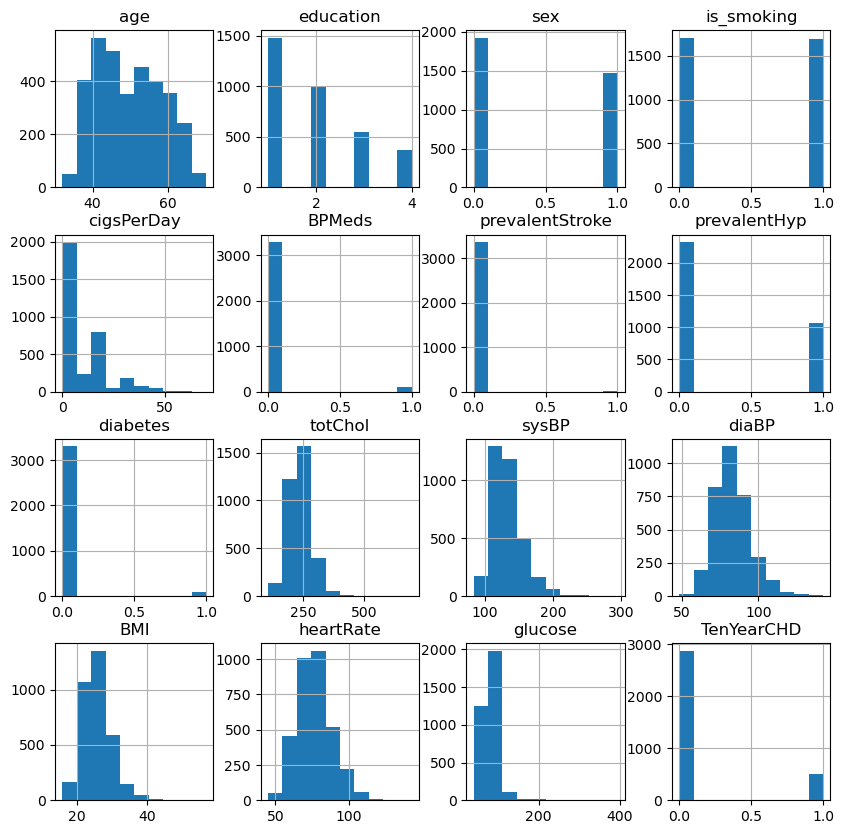

In [ ]:
#histogram for each  feature
df.hist(bins=10,figsize=(10,10))
plt.show()

### Visualizing Outliers

In [ ]:
df.describe()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.00000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,49.542183,1.946018,0.432743,0.497640,9.010619,0.029499,0.006490,0.315339,0.025664,237.039823,132.60118,82.883038,25.793251,75.976991,81.720059,0.150737
std,8.592878,1.017568,0.495529,0.500068,11.862839,0.169224,0.080309,0.464719,0.158153,44.994205,22.29203,12.023581,4.107026,11.970114,23.161265,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.030000,68.000000,72.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,27.997500,83.000000,85.000000,0.000000
max,70.000000,4.000000,1.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
outliers = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

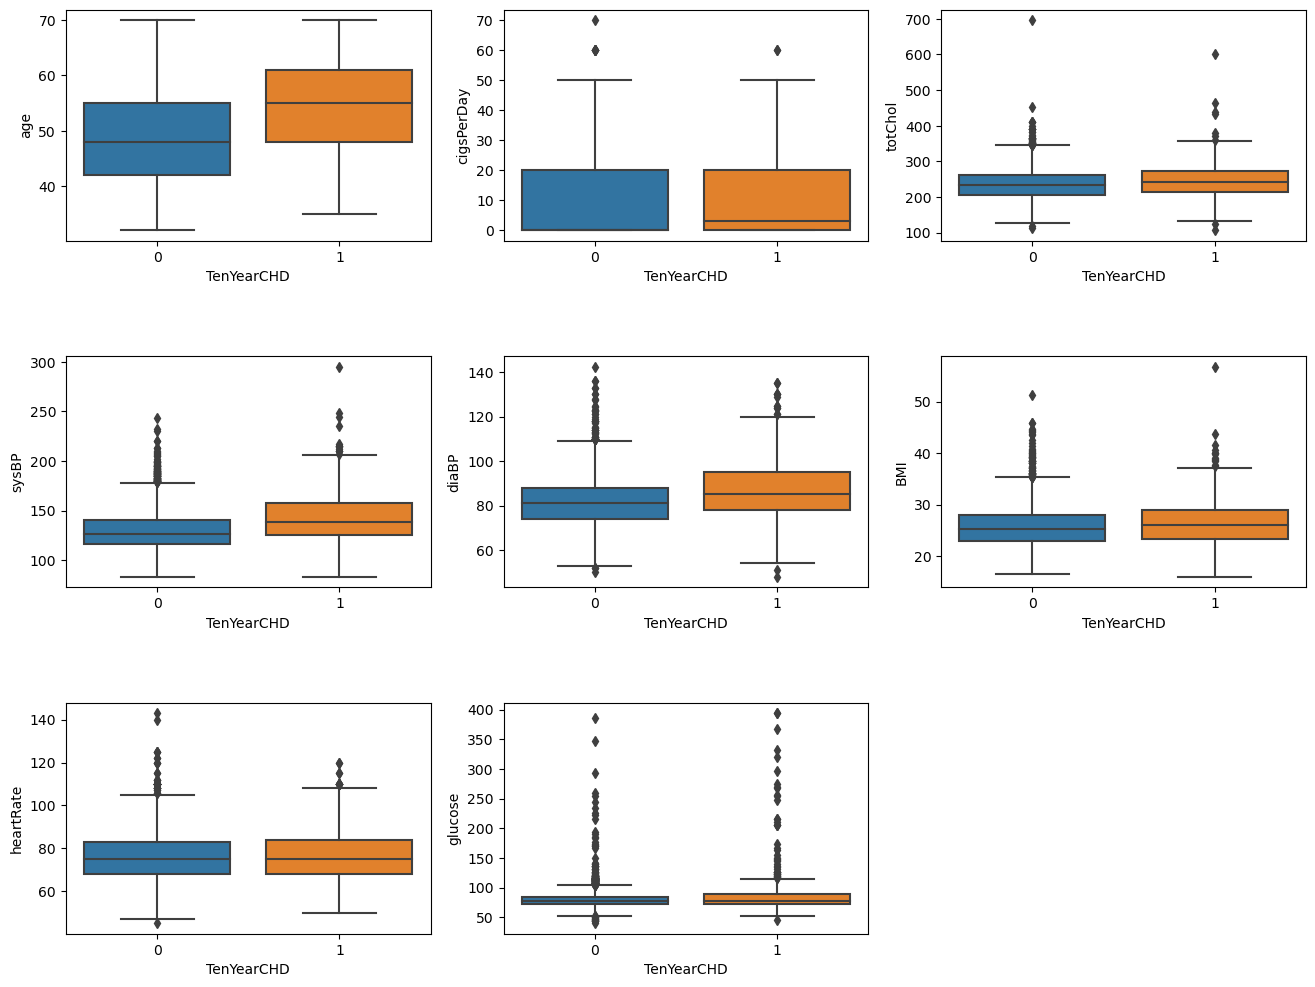

In [ ]:
# Visually observe the outliers in each column
plt.figure(figsize=(16,12))
plt.subplots_adjust(hspace=0.5)

i = 1
for col_name in outliers:
    plt.subplot(3,3,i)
    sns.boxplot(data=df, x='TenYearCHD', y=col_name)
    i +=1

In [ ]:
# creating variable for outliers calculation
outliers_var = df[outliers]
IQR= outliers_var.quantile(0.75)- outliers_var.quantile(0.25)
Q1 = outliers_var.quantile(0.25)-1.5*IQR
Q3 = outliers_var.quantile(0.75)+1.5*IQR

In [ ]:
outliers_var

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,64,3.0,221.0,148.0,85.0,25.38,90.0,80.0
1,36,0.0,212.0,168.0,98.0,29.77,72.0,75.0
2,46,10.0,250.0,116.0,71.0,20.35,88.0,94.0
3,50,20.0,233.0,158.0,88.0,28.26,68.0,94.0
4,64,30.0,241.0,136.5,85.0,26.42,70.0,77.0
...,...,...,...,...,...,...,...,...
3385,60,0.0,261.0,123.5,79.0,29.28,70.0,103.0
3386,46,0.0,199.0,102.0,56.0,21.96,80.0,84.0
3387,44,3.0,352.0,164.0,119.0,28.92,73.0,72.0
3388,60,0.0,191.0,167.0,105.0,23.01,80.0,85.0


In [ ]:
# review the total of outliers per column
((outliers_var  < (Q1)) | (outliers_var  > (Q3))).sum()

age             0
cigsPerDay      9
totChol        43
sysBP         105
diaBP          58
BMI            79
heartRate      64
glucose       214
dtype: int64

In [ ]:
outliers_rate = ((outliers_var  < (Q1)) | (outliers_var  > (Q3))).sum().sum()/len(df)*100
print(f"{outliers_rate:.0f}%")

17%


### Visualizing the Correlations

In [ ]:
def plot_features_corr(data,features):
    """plot the correlation between features"""
    corr = data[features].corr()
    plt.figure(figsize=(20,10))
    sns.heatmap(corr, annot=True, cmap= 'coolwarm')

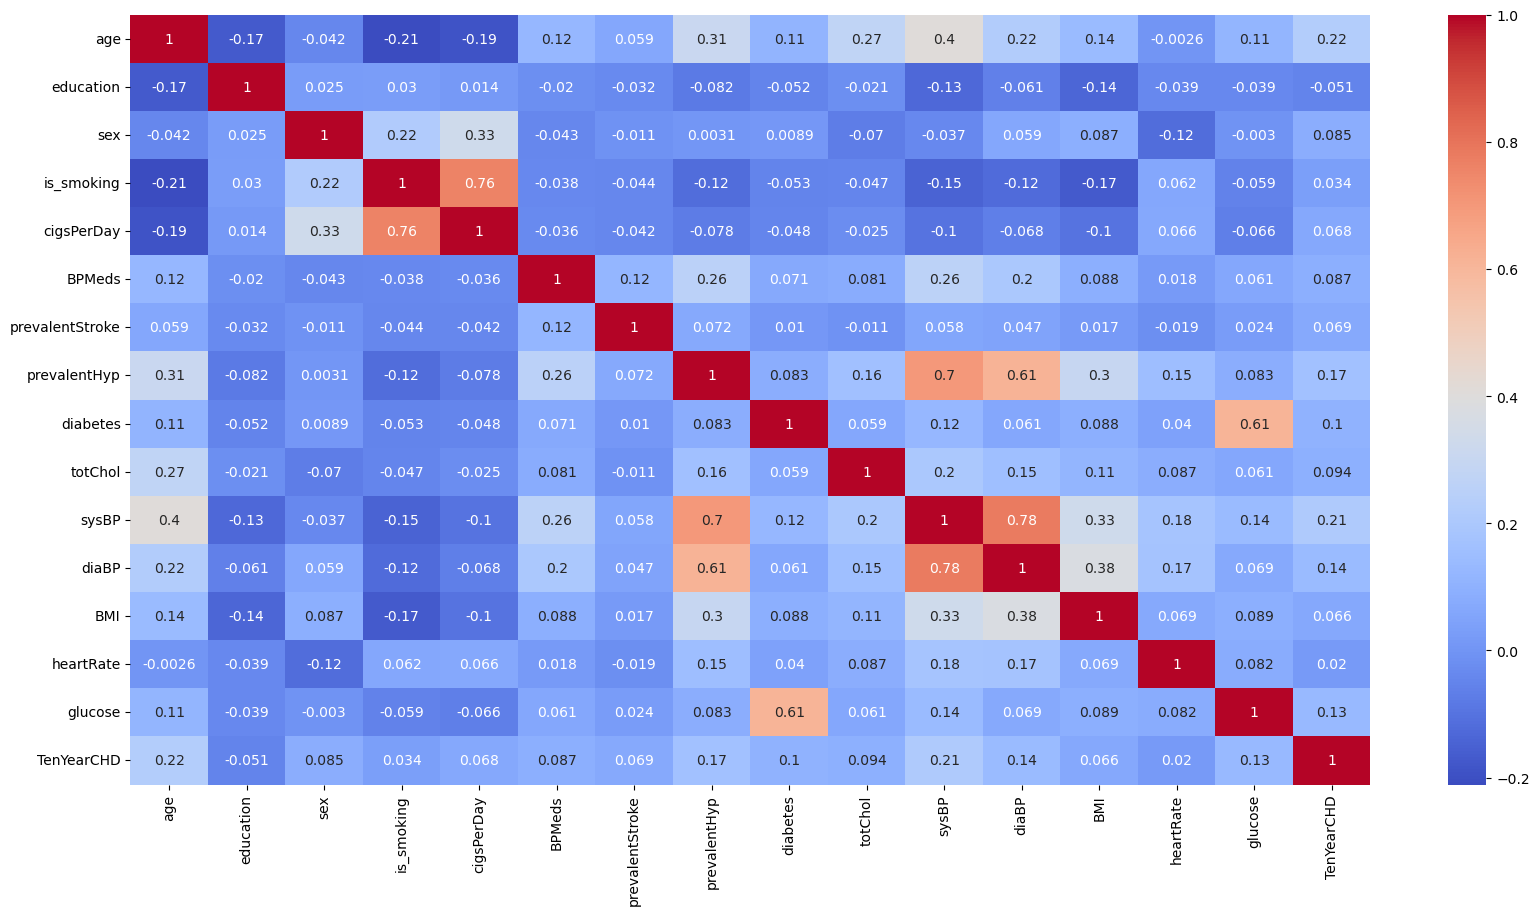

In [ ]:
# Visually observe the correlations in each column
plot_features_corr(df,df.columns)

## Model Selection

### Analysis of TenYearCHD (Target Variable)

A Count plot and a Pie chart will be two useful plots to analyse the `TenYearCHD` column as it is a categorical feature. Usefulness in the sense, both the plots will allow us to observe the distribution of each category in the feature.

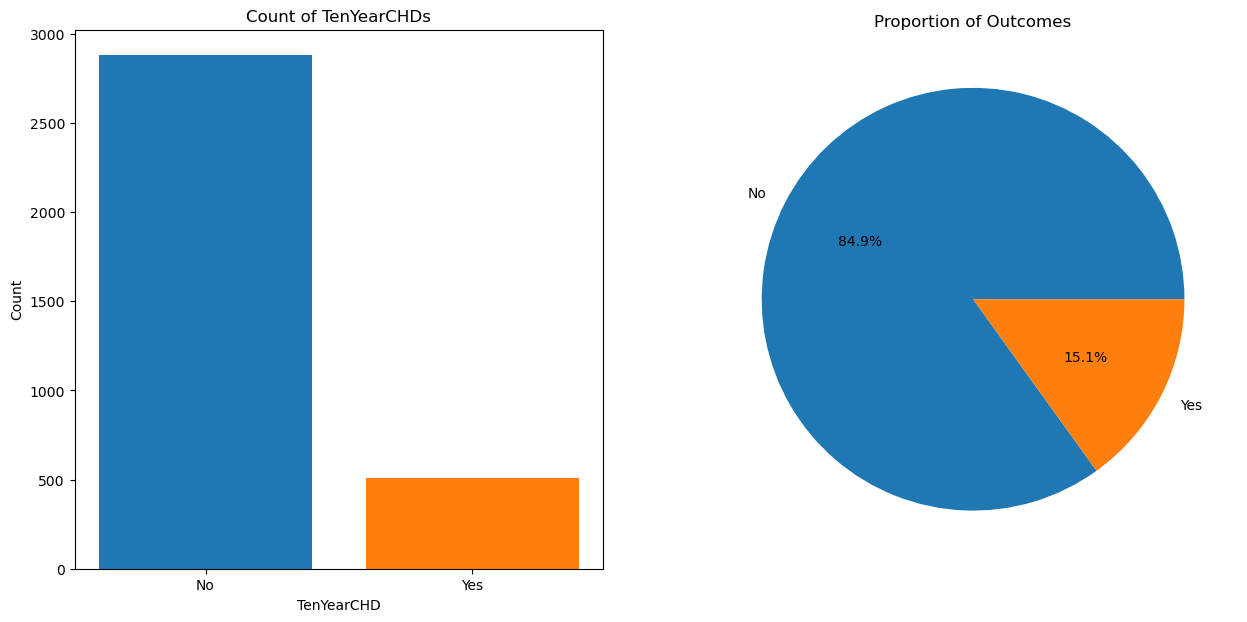

In [ ]:
# Extract default colors
colors = matplotlib.rcParams['axes.prop_cycle'].by_key()['color']

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Plot count plot on first axis
ax[0].bar([0, 1], df["TenYearCHD"].value_counts(), color=[colors[0], colors[1]])
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(["No", "Yes"])
ax[0].set_xlabel("TenYearCHD")
ax[0].set_ylabel("Count")
ax[0].set_title("Count of TenYearCHDs")

# Plot pie chart on second axis
values = df["TenYearCHD"].value_counts()
labels = ["No", "Yes"]
explode = [0.1, 0]
colors = ["blue", "orange"]
ax[1].pie(values, labels=labels, autopct="%1.1f%%")
ax[1].set_title("Proportion of Outcomes")

# Display the plot
plt.show()

The above plot shows that:

- **84.9% patients in the dataset do NOT have 10 year risk of coronary heart disease.**
- **15.1% patients in the dataset has 10 year risk of coronary heart disease.** 

Which is imbalanced result.

#### Rebalance Data

In [ ]:
data_major = df[(df['TenYearCHD']==0)]
data_minor = df[(df['TenYearCHD']==1)]
upsample = resample(data_minor,
                    replace = True,
                    n_samples = 2879,
                    random_state= 42)
df = pd.concat([upsample, data_major])

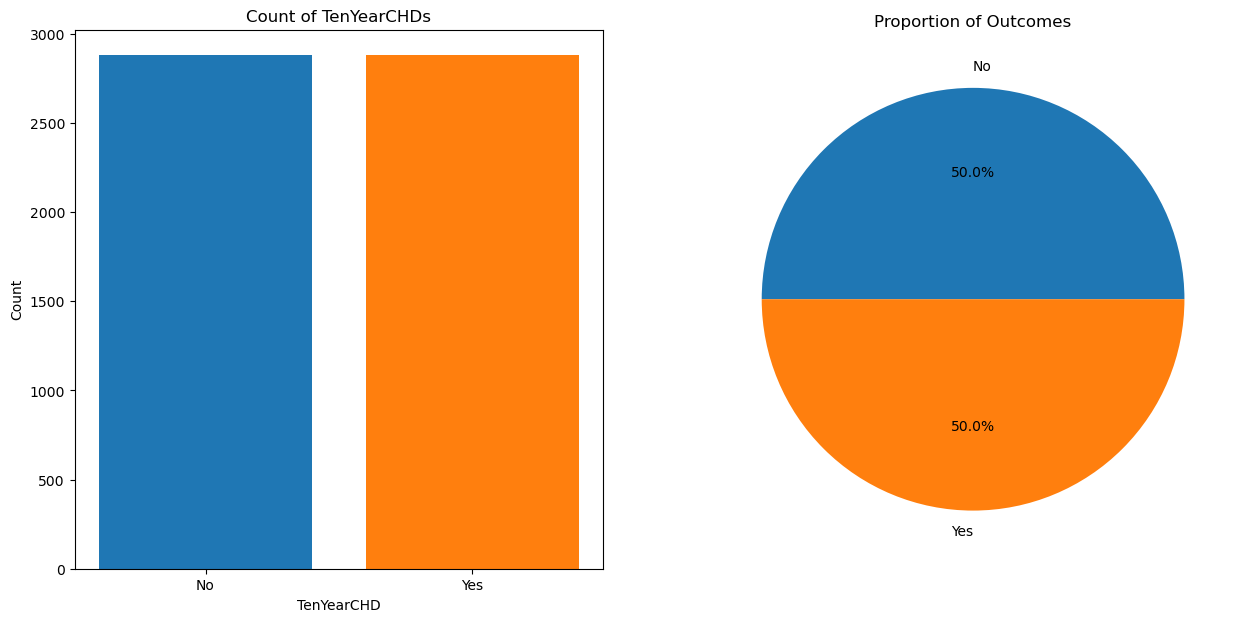

In [ ]:
# Extract default colors
colors = matplotlib.rcParams['axes.prop_cycle'].by_key()['color']

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Plot count plot on first axis
ax[0].bar([0, 1], df["TenYearCHD"].value_counts(), color=[colors[0], colors[1]])
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(["No", "Yes"])
ax[0].set_xlabel("TenYearCHD")
ax[0].set_ylabel("Count")
ax[0].set_title("Count of TenYearCHDs")

# Plot pie chart on second axis
values = df["TenYearCHD"].value_counts()
labels = ["No", "Yes"]
explode = [0.1, 0]
colors = ["blue", "orange"]
ax[1].pie(values, labels=labels, autopct="%1.1f%%")
ax[1].set_title("Proportion of Outcomes")

# Display the plot
plt.show()

## Split the data into train and test sets

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop("TenYearCHD", axis=1), df["TenYearCHD"], test_size=0.2)

In [ ]:
X_train.shape

(4606, 15)

In [ ]:
X_test.shape

(1152, 15)

## Normalize the data

In [ ]:
# Normalization
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)

## Train and evaluate different models

In [ ]:
def display_score(data):
    # create a DataFrame
    df = pd.DataFrame(data)

    # apply some styles
    styled_df = df.style.set_properties(**{'text-align': 'center'}) \
                        .set_table_styles([{'selector': 'th', 'props': [('background-color', 'lightblue')]}]) \
                        .hide_index()

    # format numerical values to two decimal places
    styled_df = styled_df.format('{:.2f}', subset=pd.IndexSlice[:, ['accuracy', 'precision', 'recall', 'f1', 'run-time']])

    # display the styled DataFrame
    return styled_df


In [ ]:
def display_tables_side_by_side(t1, title1, t2, title2):
    title1 = f'<h2 align="center">{title1}</h2>'
    title2 = f'<h2 align="center">{title2}</h2>'
    # add captions to each table
    t1 = t1.set_caption(title1)
    t2 = t2.set_caption(title2)

    # combine the HTML tables side by side with some space in between
    html = '<div style="display: flex;">' + t1.render() + '<div style="width: 20px;"></div>' + t2.render() + '</div>'

    # display the combined tables
    display(HTML(html))



In [ ]:
def train_evaluate_model(name, model,X_train,y_train,X_test,y_test, score):
    start = time.time()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    end = time.time()
    run_time = round(end-start, 2)
    score["model"].append(name)
    score["accuracy"].append(round(accuracy,2))
    score["precision"].append(round(precision,2))
    score["recall"].append(round(recall,2))
    score["f1"].append(round(f1,2))
    score["run-time"].append(round(run_time,2))
    
    print(f"Model : {name}")
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    print("Run time : %s" % "{0:.3}".format(end-start))
    print("------------------------------------------")
    

In [ ]:
def train_evaluate_model_gridsearch(name, model, param_grid, X_train,y_train,X_test,y_test, nfolds, score):
    start = time.time()
    estimator = model.fit(X_train, y_train)
    grid_search = GridSearchCV(cv=nfolds, estimator=estimator, param_grid=param_grid)
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    end = time.time()
    run_time = round(end-start, 2)
    score["model"].append(name)
    score["accuracy"].append(round(accuracy,2))
    score["precision"].append(round(precision,2))
    score["recall"].append(round(recall,2))
    score["f1"].append(round(f1,2))
    score["run-time"].append(round(run_time,2))

    print(f"Model : {name}")
    print("Grid best params: ", grid_search.best_params_)
    print("Accuracy : %s" % "{0:.3%}".format(grid_search.best_score_))
    print("Run time : %s" % "{0:.3}".format(end-start))
    print("----------------------------------------------------")
    return grid_search

In [ ]:
Models = {
    'LogisticRegression': LogisticRegression(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'SVC': SVC(),
    'XGBClassifier': XGBClassifier(),
    'RandomForestClassifier': RandomForestClassifier()
}

## Create feature selection

In [ ]:
select_feature = SelectKBest(f_classif, k=10).fit(X_train, y_train)
X_train_norm_selected = select_feature.transform(X_train_norm)
X_test_norm_selected = select_feature.transform(X_test_norm)

## Train and evaluate different models with and without feature selection

In [ ]:
score_norm_selected = {"model":[],"accuracy":[],"precision":[],"recall":[],"f1":[],"run-time":[],}
for name in Models:
    model = Models[name]
    train_evaluate_model(name, model,X_train_norm_selected,y_train,X_test_norm_selected,y_test, score_norm_selected)

Model : LogisticRegression
Accuracy : 64.670%
Run time : 0.0329
------------------------------------------
Model : KNeighborsClassifier
Accuracy : 78.212%
Run time : 0.0952
------------------------------------------
Model : DecisionTreeClassifier
Accuracy : 90.799%
Run time : 0.0204
------------------------------------------
Model : SVC
Accuracy : 65.017%
Run time : 1.89
------------------------------------------
Model : XGBClassifier
Accuracy : 91.059%
Run time : 0.476
------------------------------------------
Model : RandomForestClassifier
Accuracy : 96.528%
Run time : 0.643
------------------------------------------


In [ ]:
score_norm = {"model":[],"accuracy":[],"precision":[],"recall":[],"f1":[],"run-time":[],}
for name in Models:
    model = Models[name]
    train_evaluate_model(name, model,X_train_norm,y_train,X_test_norm,y_test, score_norm)

Model : LogisticRegression
Accuracy : 64.062%
Run time : 0.0296
------------------------------------------
Model : KNeighborsClassifier
Accuracy : 78.472%
Run time : 0.204
------------------------------------------
Model : DecisionTreeClassifier
Accuracy : 90.625%
Run time : 0.0379
------------------------------------------
Model : SVC
Accuracy : 71.181%
Run time : 2.38
------------------------------------------
Model : XGBClassifier
Accuracy : 92.622%
Run time : 1.06
------------------------------------------
Model : RandomForestClassifier
Accuracy : 97.569%
Run time : 0.951
------------------------------------------


In [ ]:
display_score(score_norm_selected)
t1 = display_score(score_norm)
t2 = display_score(score_norm_selected)
display_tables_side_by_side(t1, "Without Feature Selection", t2, "With Feature Selection")

model,accuracy,precision,recall,f1,run-time
LogisticRegression,0.64,0.63,0.65,0.64,0.03
KNeighborsClassifier,0.78,0.72,0.90,0.80,0.20
DecisionTreeClassifier,0.91,0.84,0.99,0.91,0.04
SVC,0.71,0.70,0.70,0.70,2.38
XGBClassifier,0.93,0.89,0.97,0.93,1.06
RandomForestClassifier,0.98,0.96,0.99,0.98,0.95
model,accuracy,precision,recall,f1,run-time
LogisticRegression,0.65,0.63,0.65,0.64,0.03
KNeighborsClassifier,0.78,0.72,0.91,0.80,0.10
DecisionTreeClassifier,0.91,0.85,0.99,0.91,0.02


## Improve models with GridSearchCV

In [ ]:
Cs = []
for i in range(-5, 6):
    Cs.append(2**i)
param_grids = {
    'LogisticRegression': {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}, 
    'KNeighborsClassifier': {
        'n_neighbors': range(3,32),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    
    'DecisionTreeClassifier': { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 32), 'min_samples_leaf': np.arange(1, 32)},
    'SVC': {'C': Cs, 'gamma': Cs, 'kernel': ['rbf']},
    'XGBClassifier': {
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 10],
        'learning_rate': [0.01, 0.1, 0.5]
    },
    'RandomForestClassifier': { 
        'n_estimators': [10, 50, 200, 500],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth' : np.arange(3, 32),
        'criterion' :['gini', 'entropy']
    }
}


## Compare models with and without selection after GridSearchCV

In [ ]:
score_norm_grid_selected = {"model":[],"accuracy":[],"precision":[],"recall":[],"f1":[],"run-time":[]}
grid_search_models = dict()
for name in Models:
    model = Models[name]
    param_grid = param_grids[name]
    grid_search_models[name] = train_evaluate_model_gridsearch(name,model,param_grid,X_train_norm_selected,y_train,
                                    X_test_norm_selected,y_test,5,score_norm_grid_selected)

Model : LogisticRegression
Grid best params:  {'C': 0.01, 'penalty': 'l2'}
Accuracy : 68.063%
Run time : 0.584
----------------------------------------------------
Model : KNeighborsClassifier
Grid best params:  {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
Accuracy : 85.693%
Run time : 39.7
----------------------------------------------------
Model : DecisionTreeClassifier
Grid best params:  {'criterion': 'gini', 'max_depth': 26, 'min_samples_leaf': 1}
Accuracy : 90.122%
Run time : 1.01e+02
----------------------------------------------------
Model : SVC
Grid best params:  {'C': 1, 'gamma': 32, 'kernel': 'rbf'}
Accuracy : 98.654%
Run time : 6.5e+02
----------------------------------------------------
Model : XGBClassifier
Grid best params:  {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}
Accuracy : 93.291%
Run time : 56.1
----------------------------------------------------
Model : RandomForestClassifier
Grid best params:  {'criterion': 'gini', 'max_dep

In [ ]:
score_norm_grid = {"model":[],"accuracy":[],"precision":[],"recall":[],"f1":[],"run-time":[]}
grid_search_models = dict()
for name in Models:
    model = Models[name]
    param_grid = param_grids[name]
    grid_search_models[name] = train_evaluate_model_gridsearch(name,model,param_grid,X_train_norm,y_train,X_test_norm,y_test,5,score_norm_grid)

Model : LogisticRegression
Grid best params:  {'C': 0.1, 'penalty': 'l2'}
Accuracy : 67.889%
Run time : 0.526
----------------------------------------------------
Model : KNeighborsClassifier
Grid best params:  {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}
Accuracy : 85.736%
Run time : 56.2
----------------------------------------------------
Model : DecisionTreeClassifier
Grid best params:  {'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 1}
Accuracy : 90.382%
Run time : 1.31e+02
----------------------------------------------------
Model : SVC
Grid best params:  {'C': 1, 'gamma': 16, 'kernel': 'rbf'}
Accuracy : 98.697%
Run time : 6.68e+02
----------------------------------------------------
Model : XGBClassifier
Grid best params:  {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}
Accuracy : 94.398%
Run time : 85.3
----------------------------------------------------
Model : RandomForestClassifier
Grid best params:  {'criterion': 'gini', 'max_dep

In [ ]:
t1 = display_score(score_norm_grid)
t2 = display_score(score_norm_grid_selected)
display_tables_side_by_side(t1, "Without Feature Selection", t2, "With Feature Selection")

model,accuracy,precision,recall,f1,run-time
LogisticRegression,0.64,0.63,0.65,0.64,0.53
KNeighborsClassifier,0.87,0.79,0.99,0.88,56.24
DecisionTreeClassifier,0.91,0.84,0.99,0.91,130.83
SVC,0.99,1.00,0.99,0.99,668.33
XGBClassifier,0.95,0.92,0.99,0.95,85.33
RandomForestClassifier,0.97,0.95,0.99,0.97,2932.25
model,accuracy,precision,recall,f1,run-time
LogisticRegression,0.65,0.63,0.65,0.64,0.58
KNeighborsClassifier,0.85,0.77,1.00,0.87,39.67
DecisionTreeClassifier,0.91,0.85,0.99,0.92,100.98


In [ ]:
score_norm_grid

{'model': ['LogisticRegression',
  'KNeighborsClassifier',
  'DecisionTreeClassifier',
  'SVC',
  'XGBClassifier',
  'RandomForestClassifier'],
 'accuracy': [0.64, 0.87, 0.91, 0.99, 0.95, 0.97],
 'precision': [0.63, 0.79, 0.84, 1.0, 0.92, 0.95],
 'recall': [0.65, 0.99, 0.99, 0.99, 0.99, 0.99],
 'f1': [0.64, 0.88, 0.91, 0.99, 0.95, 0.97],
 'run-time': [0.53, 56.24, 130.83, 668.33, 85.33, 2932.25]}

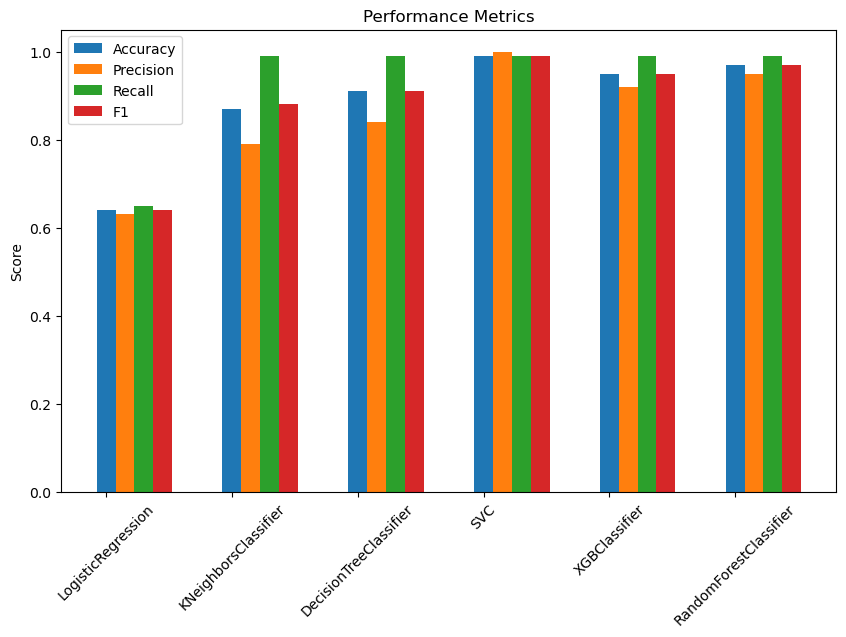

In [ ]:
# set up the data
model = score_norm_grid['model']
accuracy = score_norm_grid['accuracy']
precision = score_norm_grid['precision']
recall = score_norm_grid['recall']
f1 = score_norm_grid['f1']
# run_time = score_norm_grid['run-time']

# set up the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Performance Metrics')
ax.set_ylabel('Score')
ax.set_xticklabels(model, rotation=45)

# plot the bars
ax.bar(model, accuracy, width=0.15, label='Accuracy')
ax.bar([x + 0.15 for x in range(len(model))], precision, width=0.15, label='Precision')
ax.bar([x + 0.3 for x in range(len(model))], recall, width=0.15, label='Recall')
ax.bar([x + 0.45 for x in range(len(model))], f1, width=0.15, label='F1')
# ax.bar([x + 0.6 for x in range(len(model))], run_time, width=0.15, label='Run Time')

# add the legend
ax.legend()

plt.show()

In conclusion, this study examined various ML algorithms for predicting CHD in patients using the Cardiovascular Study Dataset from Kaggle. Feature selection and hyperparameter tuning were also explored to enhance the models' performance. The results showed that SVC and RF classifiers achieved the highest accuracy, with and without feature selection, highlighting the importance of model optimization. The study's exploration of feature selection techniques demonstrated its potential to improve accuracy and build more interpretable models. Overall, this study supports the potential of ML algorithms for CHD prediction and underscores the significance of feature selection and hyperparameter tuning. Future research can explore other feature selection methods, incorporate additional datasets, and investigate DL techniques for CHD prediction.